In [1]:
import numpy as np, pandas as pd, os
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn import svm, neighbors
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from tqdm import tqdm_notebook

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,...,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,...,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.288558,0.515875,0.920590,-1.223277,...,0.516422,0.130521,-0.459210,2.028205,-0.093968,-0.218274,-0.163136,-0.870289,0.064038,1
3,e350f17a357f12a1941f0837afb7eb8d,0.183774,0.919134,-0.946958,0.918492,0.862278,1.155287,0.911106,0.562598,-1.349685,...,-1.168967,1.385089,-0.353028,3.316150,-0.524087,-0.794327,3.936365,0.682989,-2.521211,0
4,a8f910ea6075b6376af079055965ff68,-0.203933,-0.177252,0.368074,-0.701320,-1.104391,0.735760,0.894273,-1.375826,-5.144946,...,-0.279168,1.544356,2.959727,1.641201,-0.130818,-0.264292,-0.748668,0.964218,0.087079,0


In [11]:
cols = [c for c in train.columns if c not in ['id', 'target']]

oof_lr = np.zeros(len(train))
oof_lgb = np.zeros(len(train))

skf = StratifiedKFold(n_splits=5, random_state=42)
   
for train_index, test_index in skf.split(train[cols], train['target']):
    lr_clf = LogisticRegression(solver='saga',penalty='l2',C=1.0)
    lr_clf.fit(train.loc[train_index][cols],train.loc[train_index]['target'])
    oof_lr[test_index] = lr_clf.predict_proba(train.loc[test_index][cols])[:,1]
    
    lgb_clf =LGBMClassifier()
    lgb_clf.fit(train.loc[train_index][cols],train.loc[train_index]['target'])
    oof_lgb[test_index] = lgb_clf.predict_proba(train.loc[test_index][cols])[:,1]

In [12]:
print('LR scores CV =',roc_auc_score(train['target'], oof_lr))
print('LGB scores CV =',roc_auc_score(train['target'], oof_lgb))

LR scores CV = 0.5299365047661688
LGB scores CV = 0.5376331055886602


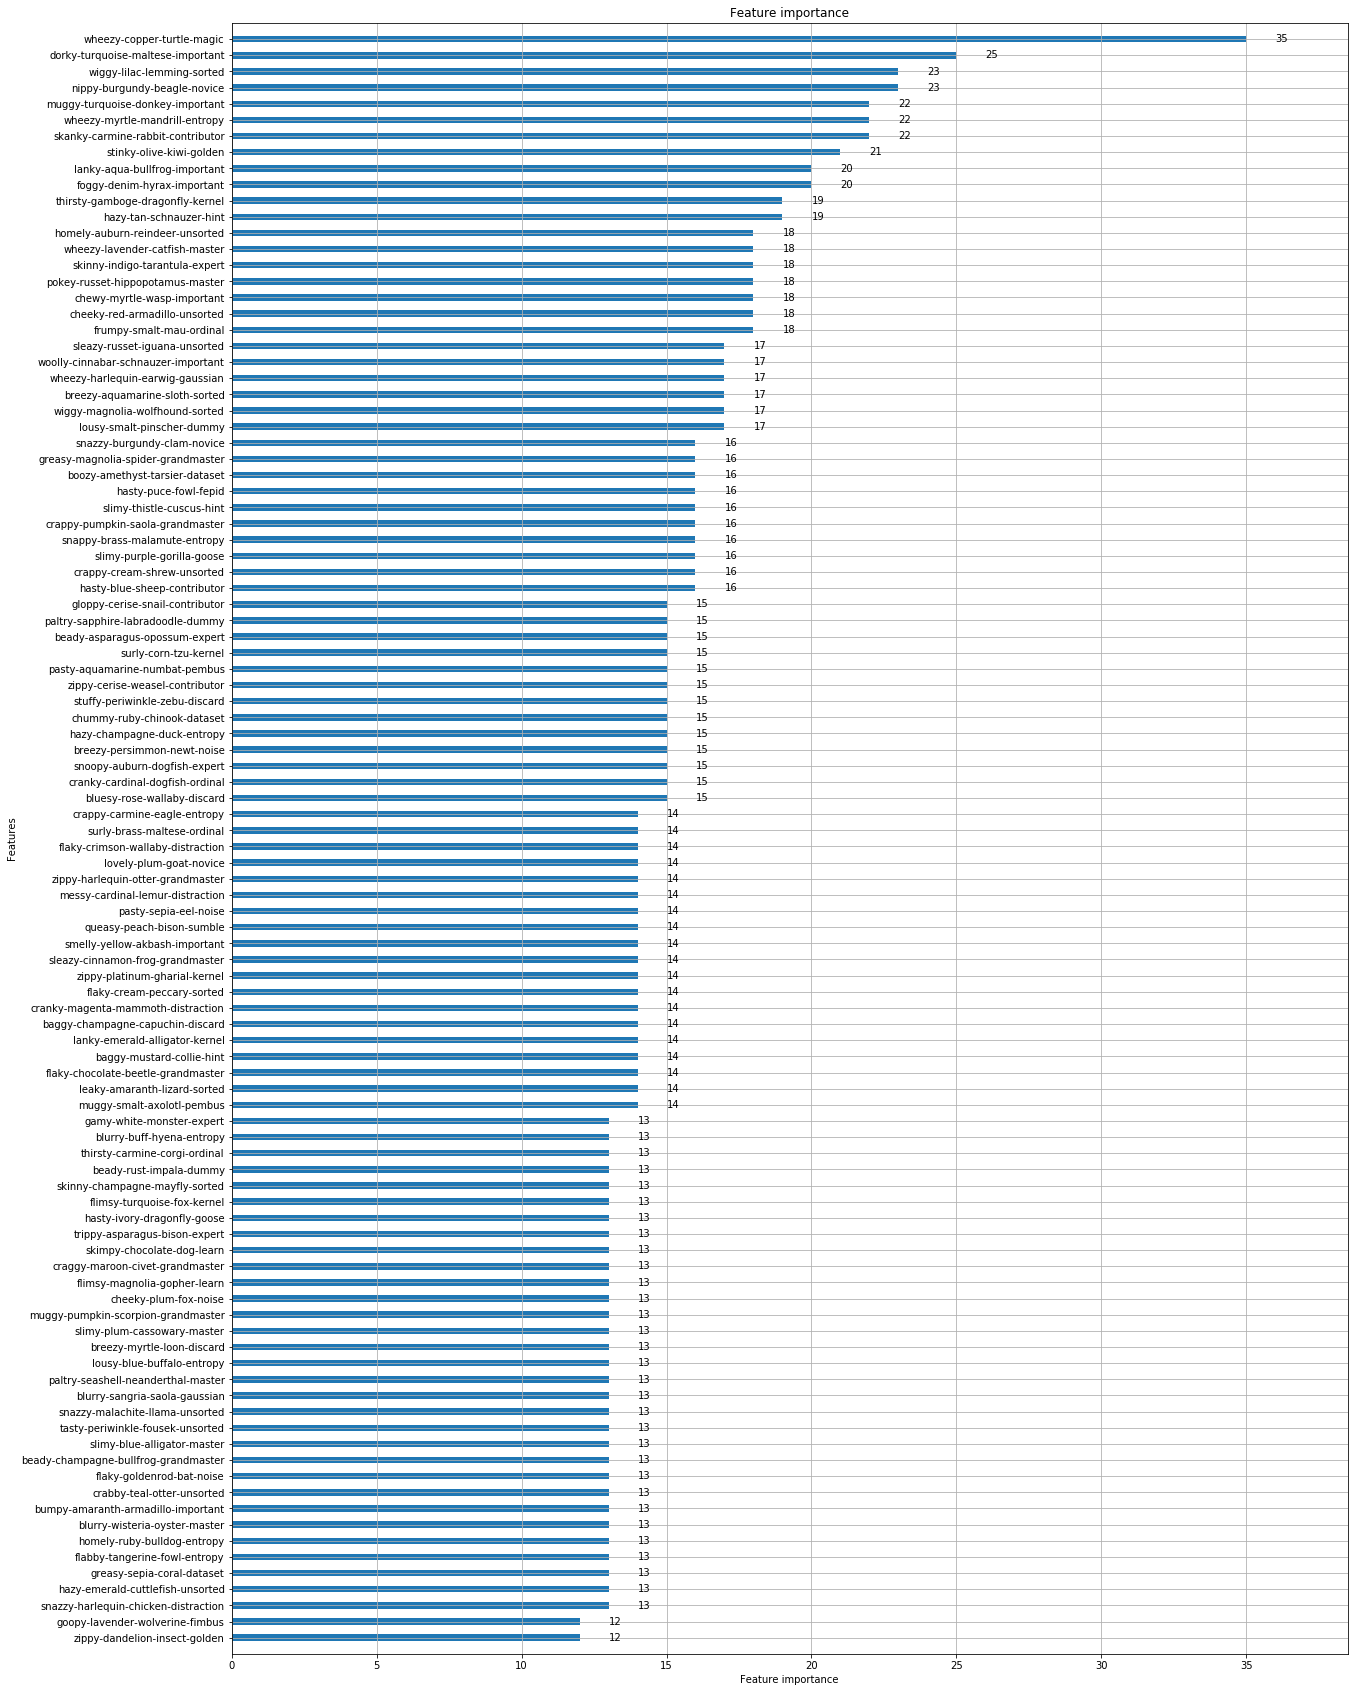

In [15]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize=(20,30))
plot_importance(lgb_clf, ax=ax, max_num_features=100, height=0.4)